In the [last part](comp-phys-mass-1.html), we have demonstrated the most basic tools of solving quantum-mechanical problems. In the end, it wasn't that hard. We chose systems that had only a finite number of possible states, which naturally led to convenient matrix representation that fully encompassed all of the physics we needed. Today, we'll be dealing with systems that, at least on surface, should be more familiar to most readers but suffer from some interesting problems on both, the abstract and practical level - dynamics of particles in real space.

---

### Losing momentum

It shouldn't surprise anyone that, if we are talking real-space dynamics, we'll start with momentum. What might be surprising, is that momentum is a rather involved concept. Everyone knows the simple relation we learned in elementary school, $\vec{p} = m\vec{v}$, which relates momentum to the velocity. This is, however, a rather specialized case of a very general concept in physics. Take, for example, classical electromagnetic fields, which can't really have mass and have [multiple different velocities](https://en.wikipedia.org/wiki/Wave_velocity) you can assign to them, yet they do [have momentum](http://www.feynmanlectures.caltech.edu/II_27.html).

A perhaps better, or more general, way of defining what is momentum, is using the [Newton's laws of motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion#Newton's_second_law), where momentum is related to applied forces:

$$ \vec{F} = \frac{d\vec{p}}{dt}. $$

From which $\Delta\vec{p} = \int \vec{F} dt$. But that's still rather unwieldy and there's no guarantee that we know the forces at play (not to mention the fact that you usually don't have *any* forces in quantum mechanics). The "real" big-boy definition of *generalized* momentum comes from analytical mechanics. If you have a [Lagrangian](https://en.wikipedia.org/wiki/Lagrangian_mechanics) $\mathcal{L}$ (a weird abstract-mathematical thing that defines [action](https://en.wikipedia.org/wiki/Action_%28physics%29) $S=\int\mathcal{L}dt$ - for our purposes just a difference of kinetic and potential energy $\mathcal{L}=T-U$), the generalized momentum is the functional derivative of the Lagrangian with respect to time-derivative of a generalized coordinate

$$ p_j=\frac{\partial\mathcal{L}}{\partial \dot{q}_j}. $$

But, because we work with Hamiltonian mechanics, you want to do a [Legendre transform](https://en.wikipedia.org/wiki/Legendre_transform) to conjure the Hamiltonian

$$ \mathcal{H}(\vec{q}, \vec{p}, t) = \vec{p}\cdot\dot{\vec{q}} - \mathcal{L}(\vec{q}, \dot{\vec{q}}, t), $$

and there the canonical momentum is the solution to one of the Hamilton's equations:

$$ -\dot{p}_i = \frac{\partial\mathcal{H}}{\partial q_i}. $$

*If this looks too abstract and confusing to you, then I achieved my goal in demonstrating that momentum is not just mass multiplied by some vector called $\vec{v}$, which tells you how far will you move along a line in some amount of time. It can be like that, but there are situations (e.g. essentially all of quantum mechanics), where tunnel-visioning on just the naive image of marbles flying around will make it hard to gain intuitive understanding of the problem.*

So, what *is* momentum in quantum mechanics? By [Noether's theorem](https://en.wikipedia.org/wiki/Noether%27s_theorem), it's the stuff that is conserved in a translation-invariant system. So if we have a Hamiltonian that looks the same when we move it by arbitrary distance, you can define a conserved quantity of stuff that we call momentum. After some [hand-waving](https://en.wikipedia.org/wiki/Momentum_operator#Derivation_from_infinitesimal_translations), you'd find out that the operator corresponding to this conserved stuff is

$$ \hat{p}_i = -i\hbar\frac{d}{dx_i}. $$

Well OK, that doesn't sound *that* bad. Can we find a basis in which we can easily work with it? Yes, we can - by solving this eigenproblem (in 1D, for simplicity):

$$ \hat{p} \; \psi(x) = -i\hbar\frac{d}{dx}\psi(x) = p \psi(x). $$

This is one of the simplest possible differential equations to solve, so without too much beating around the bush, the solution is

$$ \psi(x) = A\mathrm{e}^{\frac{i}{\hbar}p\cdot x}. $$

And this is where it becomes problematic. The smaller issue is with normalization: The integral $\int _{-\infty}^{\infty}dx \; \mathrm{e}^{ip\cdot x}$ doesn't have a finite value, so it's not possible to to define the constant prefactor $A$ using the typical methods. What you can do, is use something called the delta function normalization. The idea there is to use the fact that the basis has to be orthonormal, i.e. $\int dx \; \phi^*_n(x)\phi_m(x) = \delta_{n,m}$, which then allows you to [abuse the properties of Fourier transforms](https://physics.stackexchange.com/questions/252537/quantum-mechanics-how-exactly-does-delta-function-normalization-work-for-eige) to arrive at a finite value.

The much more problematic part is the [cardinality](https://en.wikipedia.org/wiki/Cardinality) of the (infinite) set of possible momenta. The basis spans a space that's much larger than any Hilbert space of any [square-integrable functions](https://en.wikipedia.org/wiki/Square-integrable_function). To solve both of this problems, we'll limit ourselves to a finite volume of space and a finite resolution. Before we get to that, we should talk a little bit about the consequences of doing it.

### Feeling incomplete

In the previous part, we had systems that had a finite number of possible states (at most eight, in our examples). This meant that we could easily contain all the information about the system in our computer memory. But what happens if a system has too many states, potentially an infinite amount? Well, in that case, you have to survive with only a smaller subset of the basis. This is completely fine in most cases, as we are usually interested in the properties of the ground state or few low-lying states above it - this is where all the interesting quantum mechanics happens. Formally, this means that there exists a projector operator that selects out only the part we care about

$$ \hat{P} = \sum_{i<\infty} \left| \phi_i \right> \left< \phi_i \right|, $$

that has a complement operator $\hat{Q} = \hat{1} - \hat{P}$ which would project onto the ignored part of the basis. Any operator $\hat{A}$ then becomes

$$ \hat{A} = \hat{1} \cdot \hat{A} \cdot \hat{1} =
\left( \hat{P} + \hat{Q} \right) \cdot \hat{A} \cdot \left( \hat{P} + \hat{Q} \right) =
\hat{P} \cdot \hat{A} \cdot \hat{P} + \hat{P} \cdot \hat{A} \cdot \hat{Q} + \hat{Q} \cdot \hat{A} \cdot \hat{P} + \hat{Q} \cdot \hat{A} \cdot \hat{Q} = \\
\sum_{ij} A_{ij} \left| \phi_i \right> \left< \phi_j \right| + 
\left[ \hat{P} \cdot \hat{A} \cdot \hat{Q} + \hat{Q} \cdot \hat{A} \cdot \hat{P} + \hat{Q} \cdot \hat{A} \cdot \hat{Q} \right], $$

where $A_{ij}$ is the computer memory representation of the operator. The terms in the square parens represent coupling to the high-energy subspace and the operator acting on the high-energy subspace itself, and they all get ignored because life of a operator sometimes sucks. You can do the similar trick with representation of states:

$$ \left| \psi \right> = \hat{1} \left| \psi \right> =
\left( \hat{P} + \hat{Q} \right) \left| \psi \right> =
\sum_i \psi_i \left| \phi_i \right> + \hat{Q} \left| \psi \right>, $$

where we trash the high-energy $\hat{Q} \left| \psi \right>$ term. In the end, we didn't change anything in the way of doing calculations but you should keep this in mind. We're no longer working with the full information about our system.

### Well, well, well...

Most of you probably already guessed the systems we'll be dealing with today when I said that we'll do stuff that's contained into a finite volume. Yes, it's the everyone's favorite particle in a infinite potential well - with some twist, of course.

Formally, the Hamiltonian consists of a kinetic energy and potential terms. The kinetic energy is (in 1D)

$$ \hat{T} = -\frac{\hbar^2}{2m} \int_{-\infty}^{\infty}dx \; \left| x \right> \frac{d^2}{dx^2} \left< x \right|, $$

where $\left| x \right>$ is the position basis wavefunction. The full position basis consists of the "bad" Dirac basis functions (i.e. the full set is $\{ \left| x \right> \}_{x \in \mathbb{R}}$) and the position operator acts as $\hat{x} \left| x \right> = x \left| x \right>$. The potential energy is formally expressed as

$$ \hat{V} = \int_{-\infty}^{\infty}dx \; \left| x \right> V(x) \left< x \right|, $$

with $V(x)$ being a potential that includes both the infinite "walls" of the well and any additional potential $W(x)$ inside:

$$ V(x) = \begin{cases} \infty & \text{for} \; x \le 0 \\
W(x) & \text{for} \; 0 < x < l \\
\infty & \text{for} \; x \ge l \end{cases} $$

where $l$ is the width of our potential well. Any single-particle state in this representation can be written as

$$ \left| \psi \right> = \int _{-\infty}^{\infty}dx \; \psi(x) \left| x \right>, $$

with $\psi(x) = \left< x | \psi \right>$ as the wavefunction. As I said, the Dirac set $\{ \left| x \right> \}_{x \in \mathbb{R}}$ is not good because the uncountably many basis functions are too densely spaced and cause too many singularities in calculations, so we need something else for numerics.

We'll get to doing code soon, so I'll get the used packages out of the way now:

In [1]:
using SparseArrays
using LinearAlgebra
using LinearMaps
using IterativeSolvers
using FFTW
using KrylovKit
using Plots

`LinearAlgebra` and `Plots` are nothing new. `FFTW` is the wrapper for the popular [FFTW](http://www.fftw.org) library which will be used to do some representation transformations using Fourier transforms (sine transforms, really). The more fun ones are `LinearMaps`, `IterativeSolvers` and `KrylovKit` and they probably deserve some comments.

For reasons that you'll see in a minute, we'll be dealing with large matrices today. Most of them sparse, so we could, in principle, use the built-in [sparse arrays](https://docs.julialang.org/en/v1/stdlib/SparseArrays/index.html) for efficient matrix operations. But there's a more interesting way of doing things.

When we get down to brass tacks, the only thing we're really doing is solving an eigenvalue problem, which has a relatively straight-forward implementation for small dense matrices and vectors. For bigger problems, the naive implementations (typically some forms of the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm)) are not efficient or even feasible and you have to do some form of [matrix-free algorithms](https://en.wikipedia.org/wiki/Matrix-free_methods). The nice thing about these methods is that you don't need to know your matrix, only how it acts on a vector. A large class of these methods are [Krylov subspace iterative methods](https://en.wikipedia.org/wiki/Krylov_subspace), like those implemented in the venerable [ARPACK](https://www.caam.rice.edu/software/ARPACK/) library (used in many pieces of scientific software, including Python's SciPy) or in the `KrylovKit` package we'll use today, although not for eigendecomsposition. The other popular method is using the [LOBPCG](https://en.wikipedia.org/wiki/LOBPCG) algorithm implemented in `IterativeSolvers`, which does a steepest descent to converge to the an extremal eigenvalue. At their core, all that both of the algorithms do is repeated matrix multiplication and normalization of a (initially random) vector, until it converges towards an eigenvector with the smallest or largest eigenvalue. By far the most computationally expensive part is the matrix-vector multiplication, so that part is left to the users, who have to supply a function that returns the vector after multiplication themselves. In lower level (or just plainly old) languages this is handled by rather clunky (but efficient) callbacks and in newer languages with [first-class functions](https://en.wikipedia.org/wiki/First-class_function) (as is the case in our situation) by simply passing a function that acts like matrix-vector multiplication. And this is where `LinearMaps` comes into play: It leverages a bunch of Julia language features that allow for efficient composition and operations on vector-to-vector linear maps (or operators) - in simpler terms, it allows you to construct something that behaves like a matrix just by telling the program what it does to a vector. This reduces the memory footprint and number of calculations, and will allow us to write some really nice code.

As usual, we need computational bases. Yes, plural. [Previously](comp-phys-mass-1.html), we had just one basis to represent everything, but this time, some things will be much more convenient to write down in different representations, so we'll have two and transform between them as needed.

### (Not really) momentum representation

The first basis will be one where the kinetic energy operator $\hat{T}$ is diagonal, i.e. it consists of solutions to the equation (with $\hbar$ = 1)

$$ -\frac{1}{2m} \frac{d}{dx^2} \phi_n(x) = E \; \phi_n(x) .$$

In general, the solution is a linear combination of complex exponentials, but with the added boundary condition $\phi_n(0) = \phi_n(l) = 0$ (the particle is confined to our potential well), it becomes:

$$ \left< x | \phi_n \right> = \phi_n(x) = \sqrt{\frac{2}{l}} \sin{\frac{n \pi x}{l}} .$$

In [2]:
function ϕ(x, n, l)
    sqrt(2/l) * sin.(n * π * x / l)
end;

Hopefully, you all know how sine functions look like, but just in case, here are the first five of the basis functions.

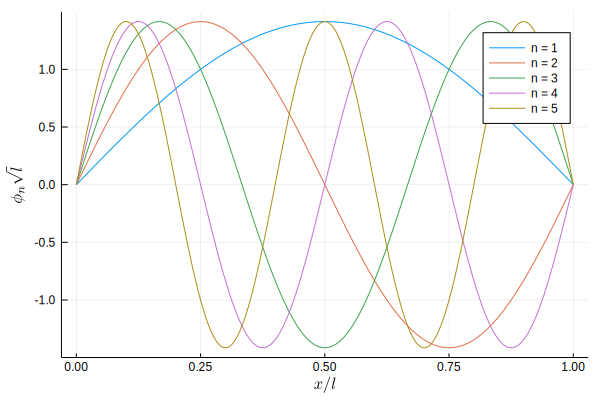

In [3]:
plot([x -> ϕ(x, n, 1) for n in 1:5], 0:0.001:1, label = ["n = $n" for _ in 1:1, n in 1:5])
plot!(xlabel="\$ x/l \$")
plot!(ylabel="\$ \\phi _n \\sqrt{l} \$")

As I said, we chose this basis so that the kinetic energy operator is diagonal, with $\hat{T} \left| \phi_n \right> = \frac{n^2 \pi ^2}{2 m l^2} \left| \phi_n \right>$, so the operator just multiplies the the vector by the energy eigenvalues:

In [4]:
function T(n_max, mass, l)
    f(v) = map(enumerate(v)) do (n, el)
        n^2 * π^2 / (2 * mass * l^2) * el
    end
    LinearMap(f, n_max, issymmetric=true)
end;

The more nitpicky of you will probably object that this is *not* a "true" momentum basis, but a basis of the square of momentum $\hat{p}^2$ and you would be right. In a confined system such as the infinite potential well, the "true" momentum basis is bit of a [touchy subject](https://physics.stackexchange.com/questions/362305/whats-the-deal-with-momentum-in-the-infinite-square-well) (tl;dr: there's no way to make momentum eigenfunctions work with our boundary conditions), but you'll often see people use the name also for the kinetic energy basis because it's shorter to type and still has many of the relations to the position representation. That's at least the reason why I'm doing it right now.

*This is our first encounter with the `LinearMap` type. We supply it with the the vector-to-vector linear map as a function, the size of the vector and a boolean that tells it whether or not the would-be matrix is symmetric. The function `f(v)` in our case just takes the vector and multiplies the n-th element by the corresponding eigenvalue, which is done using the `map(iterable) do x ... end` construct. This is just syntactic sugar for `map(x -> ..., iterable)` that's more readable if the mapped function is too long.*

*This is also the place where I can demonstrate the first of the many conveniences of `LinearMaps`. After creating the "matrix", which is in reality just a function, I can apply it to a vector using multiplication as if it were a regular matrix. Like so:*

In [5]:
v = [1; 1; 1]
test = T(3, 1, 1)
test * v

3-element Array{Float64,1}:
  4.934802200544679
 19.739208802178716
 44.41321980490211 

*Those of you, who follow along in a different language, have two options: Either use sparse matrices and use built-in sparse linear algebra (i.e. users of Eigen, SciPy, etc.) or use just bare functions and corresponding matrix-free method libraries. Or you can just follow along with dense linear algebra, but don't be surprised when numerics with 10000x10000 complex number matrices become slow or memory-heavy.*

You might have noticed, that in the plot of basis functions, I said *first five*. That's because there is no last basis function. The energy of the particles has (on our level of discussion) no upper limit and we need to introduce some cutoff `n_max`, beyond which all the states are unrepresentable. This has consequences that go beyond just maximum allowed energy of our system...

### (Not really) position representation

As I already mentioned in the intro, the position basis is not good for more than just practical reasons. The easiest way to go around it is to slap your system on a discrete grid, something that's essentially forced on us by using the cutoff in energy. If we have a partial momentum basis $\left\{ \left| \phi_n \right> \right\}_{n=1}^{n_{max}}$, we can define an evenly-spaced grid with $n_{max}$ points $\left\{ x_j \right\}_{j = 1}^{n_{max}} = \left\{ \Delta \cdot j \right\}_{j = 1}^{n_{max}}$ with $\Delta = \frac{l}{n_{max} + 1}$:

In [6]:
function make_grid(n_max, l)
    Δ = l / (n_max + 1)
    (Δ, [i * Δ for i in 1:n_max])
end;

With these, we can define a new basis of not-entirely-Dirac-delta functions:

$$ \left| \vartheta_j \right> = \sqrt{\Delta} \sum _{n = 1} ^{n_{max}} \phi_n (x_j) \left| n \right> ,$$

and that can be used to write down the wave functions in real-space as

$$ \left< x | \vartheta_j \right> = \vartheta_j(x) = \sqrt{\Delta} \sum _{n = 1} ^{n_{max}} \phi_n(x_j)\phi_n(x) .$$

In [7]:
function ϑ(x, j, l, n_max)
    Δ = l / (n_max + 1)
    sqrt(Δ) * sum([ϕ(Δ * j, n, l) * ϕ(x, n, l) for n in 1:n_max])
end;

The real-space position basis functions corresponding to the 5 previous ones look likes this:

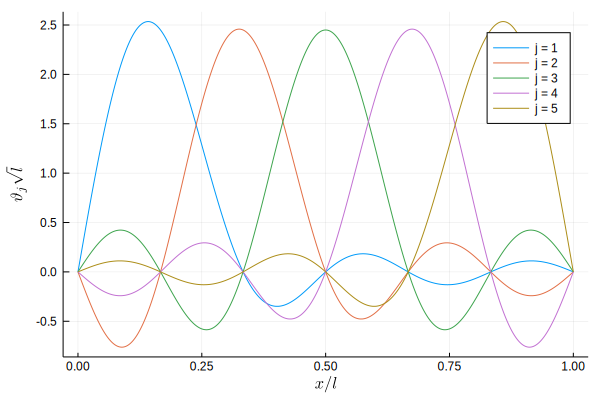

In [8]:
plot([x -> ϑ(x, j, 1.0, 5) for j in 1:5], 0:0.001:1, label = ["j = $j" for _ in 1:1, j in 1:5])
plot!(xlabel="\$ x/l \$")
plot!(ylabel="\$ \\vartheta _j \\sqrt{l} \$")

It might be a bit hard to see what's going on in that plot, so let's select just one wave function close to the center with a higher cutoff $n_{max}$ = 50:

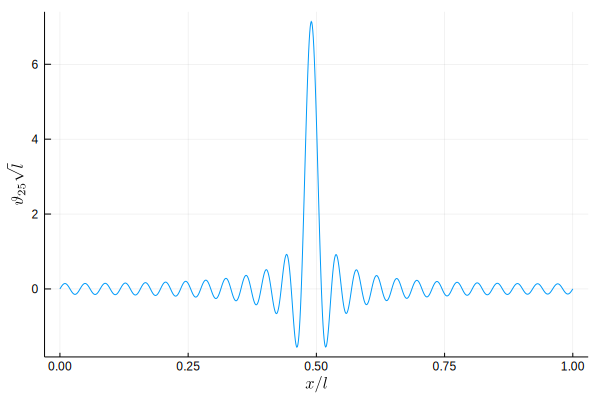

In [9]:
plot(x -> ϑ(x, 25, 1.0, 50), 0:0.001:1, label="")
plot!(xlabel="\$ x/l \$")
plot!(ylabel="\$ \\vartheta _{25} \\sqrt{l} \$")

These basis functions are orthonormal and highly localized, in the sense that they that they have non-trivial values only close to $x_j$ for $\vartheta_j$ and are close to zero everywhere else (they are actually zero at every point $x_{j\prime}$ for $j\prime \ne j$), or in math form:

$$ \vartheta_j (x_{j\prime}) = \frac{\delta_{j j\prime}}{\sqrt{\Delta}} .$$

This is super useful for a few reasons:

* If we have a real-space wave function as a vector in the position basis $\left| \psi \right> = \sum _j \psi_j \left| \vartheta _j \right>$, then we know it's values at the grid points:
$$ \psi (x_j) = \left< x_j | \psi \right> = \left< x_j \right| \sum _{j\prime} \psi_{j\prime} \left| \vartheta _{j\prime} \right> = \sum _{j\prime} \psi _{j\prime} \left< x_j | \vartheta_{j\prime} \right> = \frac{\psi_j}{\sqrt{\Delta}} .$$
This means that, if the grid is fine enough, we can simply interpolate between grid points to get the wave function in the whole space.
* If a function $f(x)$ changes slowly over the interval $\Delta$ at $x_j$, we can approximate it by values only at the grid points:
$$ f(x)\vartheta_j(x) \approx f(x_j)\vartheta_j(x) .$$
We'll (ab)use this fact a lot when defining, e.g., the potential energy operator.

These two points are also why I said that we'll be dealing with large matrices today. All approximations become exact in the limits of $n, j \to \infty$, so you want a dense grid for them to be good enough for calculations.

With this, we have all we need to define our potential operator, which is just a carbon copy of what I wrote in the second bullet point, just with $f(x) \mapsto W(x)$. The only thing the potential operator does (usually), is to multiply the wave function with the value of the potential at a given point which makes it very easy to write in the position basis:

In [10]:
function V(n_max, Wg)
    f(v) = v .* Wg
    LinearMap(f, n_max; issymmetric=true)
end;

With the operators $\hat{T}$ and $\hat{V}$, we have all we need to write down the Hamiltonian $\hat{H} = \hat{T} + \hat{V}$, but there's a catch: The two operators are currently in different representations, so we can't just add them as is. We need a way to switch between the momentum and position representation.

### Transformations

OK, so how do we make the our current two operators compatible? We need to change representation of one of them into the representation used for the other. There's nothing that should stop us in doing that, as the *state* doesn't care in which basis we expand it in:

$$ \left| \psi \right> = \sum _{n = 1} ^{n_{max}} \psi_n \left| \phi_n \right> = \sum _{j = 1} ^{n_{max}} \psi_j \left| \vartheta _j \right> .$$

The coefficients $\psi_n$ and $\psi_j$ are of course different, but the state $\left| \psi \right>$ is still physically the same state. If you scroll up a bit and look at the definition of $\left| \vartheta_j \right>$, you see that we can insert it into the previous equation and have an expression with just $\phi_n$:

$$ \sum _{n = 1} ^{n_{max}} \psi_n \left| \phi_n \right> = \sum _{j = 1} ^{n_{max}} \psi_j \left[ \sqrt{\Delta} \sum _{n\prime = 1} ^{n_{max}} \phi_{n\prime} (x_j) \left| \phi_{n\prime} \right> \right] = \sum _{n\prime = 1} ^{n_{max}} \left[ \sqrt{\Delta} \sum _{j = 1} ^{n_{max}} \psi_j \phi_{n\prime} (x_j) \right] \left| \phi_{n\prime} \right> .$$

As the basis $\left\{ \left| \phi_n \right> \right\}$ is orthonormal, the above equation reduces to:

$$ \psi_n = \sqrt{\Delta} \sum _{j = 1} ^{n_{max}} \psi_j \phi_n (x_j) = \sum _{j = 1} ^{n_{max}} X_{n j} \psi_j ,$$

where we introduced the representation transform matrix:

$$ X_{n j} = \left< \phi_n | \vartheta_j \right> = \sqrt{\Delta} \phi_n (x_j) = \sqrt{\frac{l}{n_{max} + 1}} \sqrt{\frac{2}{l}} \sin{\left( \frac{n \pi x_j}{l} \right)} = \sqrt{\frac{2}{n_{max} + 1}} \sin{\left( \frac{n j \pi}{n_{max} + 1} \right)} ,$$

which is about as convenient to use as it is to write down in LaTex (not at all). The good news is that the matrix is symmetric and works both ways, i.e. $\psi_n = \sum _{j = 1} ^{n_{max}} X_{n j} \psi_j$ and $\psi_j = \sum _{n = 1} ^{n_{max}} X_{n j} \psi_n$. We could just take this definition and use it define our transformation operator, but that wouldn't be smart because it's a lot of typing and (more importantly) it's not efficient - this brute force approach requires $n_{max}^2$ operations. If you look at the above equation for long enough, you'll recognize that it's a [sine transform](https://en.wikipedia.org/wiki/Sine_and_cosine_transforms). Fortunately, [discrete sine transforms](https://en.wikipedia.org/wiki/Discrete_sine_transform) (our case is a DST-I) can be calculated efficiently using Fourier transforms (with asymptotic complexity $\mathcal{O}(n_{max}\cdot\log{\left( n_{max} \right) })$ and the FFTW library has routines specifically for [that purpose](http://www.fftw.org/fftw3_doc/Real_002dto_002dReal-Transforms.html) so we'll use that:

In [11]:
function Rpr(n_max)
    norm = sqrt(2 * (n_max + 1))
    LinearMap(v -> FFTW.r2r(v, FFTW.RODFT00) / norm, n_max; issymmetric=true)
end;

The transform operator $\hat{X}$ is called `Rpr` in my code, because X is too common of a letter. The only peculiarity is that FFTW doesn't normalize the transforms according to conventions used in most the literature and software, so we need to do that by hand. It can be directly applied to a state vector to switch from one representation to another and, if we want to use it to transform operators, we just have to do $\hat{A}_M= \hat{X} \cdot \hat{A}_P \cdot \hat{X}$ if we want to switch from position to momentum or vice versa (think of it as the operators acting on a vector from right to left - transform the state, act with the operator, transform back).

### The situation of gravity

Let's put all of it to use. We'll do something that everyone should be familiar with from daily experience - gravitational field $W(x) = m g x$. The "ground" in our case is at x = 0 and x > 0 is away from the ground, so "up" is to the right on all the plots that follow.

We'll follow the old tradition of assuming no friction or air resistance, and make the spherical cow a *quantum* cow (and name it "Particle"). The Hamiltonian of our quantum cow is rather simply:

$$ \hat{H} = -\frac{\hbar^2}{2 m} \frac{d^2}{dx^2} + m g \hat{x}. $$

On top of defining the Hamiltonian, we'll also furnish the problem with a boundary condition $\psi(x) = 0$ for $x \le 0$ because cows don't live underground.

Now is the time to talk about characteristic sizes of things - choice of units will be somewhat arbitrary in this case, as we'll be doing everything in relation to these characteristic sizes and everything is dimensionless. The characteristic length will be $l^* = \sqrt[3]{\frac{\hbar^2}{m^2 g}}$, which is roughly the extent of the ground state of the above Hamiltonian. Using this, we can define the characteristic time $t^* = \frac{m{l^*}^2}{\hbar} = \sqrt[3]{\frac{\hbar}{mg^2}}$ and the characteristic energy $E^* = \frac{\hbar}{t^*} = \sqrt[3]{m g^2 \hbar^2}$. When you try to express the physical constants using $E^*$, $t^*$ and $l^*$, you'll find out that $\hbar = g =1$ and everything in the Hamiltonian scales just with the mass $m$, which we could also pin against some mass, and have it in multiples of, let's say, the mass of an electron $m^* = \frac{m}{m_e}$ (this is why they teach you dimensional analysis in school, kids).

The problem above has an analytical solution in terms of [Airy functions](https://en.wikipedia.org/wiki/Airy_function) (named after George Airy, not because they are light) and you can search the Internet for how to do that. Triangular potential wells commonly appear in semiconducting electronics, when you make [2D electron gases](https://en.wikipedia.org/wiki/Two-dimensional_electron_gas) or in the [WKB approximation](https://en.wikipedia.org/wiki/WKB_approximation), so don't panic if Google throws a bunch of electronics research papers on you. Airy functions are defined as solutions to the [Airy differential equation](http://mathworld.wolfram.com/AiryDifferentialEquation.html), so the only thing you have to do is to convince yourself that the Schrödinger's equation with the above Hamiltonian has the same form.

I can already hear the "Less talking, more coding", so here's the function that constructs the above Hamiltonian:

In [12]:
function HP(n_max, W, m, l)
    Δ, xs = make_grid(n_max, l)
    TP = Rpr(n_max) * T(n_max, m, l) * Rpr(n_max)
    VP = V(n_max, W.(xs))
    TP + VP
end;

No surprising code here. We create the kinetic and potential energy operators using the function we defined a few paragraphs above. The kinetic energy operator created by the function `T` is in momentum representation, so we change it to operator in position representation `TP` by using the representation transform operator. Potential energy operator `VP` is in the correct representation, so we can add them both to get the Hamiltonian in position basis (you could do it the other way around, but I will not do that so that I can show a few things).

One last thing that requires a little bit of thought is the resolution and span of our model space, which we need to set to values that will allow us to get good precision and don't take forever to calculate. The real physical system as shown above exists in a semi-infinite space ($x > 0$), which is obviously something we cannot replicate in the numerical calculation, that will be done in a box ($l > x > 0$). How big you want to make the box depends on how many states you want to recover. All the states are bound states and their wave functions will go to zero as $x$ approaches infinity, however, they spread out as they get higher in energy. You want to make the box big enough for your highest energy state of interest to be almost fully contained within it (there will be always tail of the wave function outside of the box, but that should be close to zero). Next up is the resolution (or the size of our Hilbert space) defined by the cutoff. Obviously, the cutoff needs to be bigger than the number of states you're interested in - you can't represent the 11-th excited state, if your operators span only the subspace of the 5 states (unless you're lucky or smart about your basis, but that's besides the point). It also needs to be high enough to have the resolution to faithfully represent functions of the position (like the potential). A bit trial and error shows that $l = 10 \, l^*$ and $n_{max} = 30$ is good enough for our first attempt.

First, we should confirm that it works. The analytical ground-state energy is $E_1 \approx 1.8558 \, E^*$, so let's solve the eigenproblem and compare (with $m = 1$, so I simply used the `identity` function for potential):

In [13]:
H = HP(30, identity, 1, 10)
r = lobpcg(H, false, 3)
r.λ[1]

1.8559482625901935

The ground-state energy is close to analytical value so, by induction from this base case, I claim that it works everywhere (using this proof in an academic setting is not recommended). The call to the `lobpcg` eigensolver is pretty straightforward. You supply it with the linear operator you want to decompose, a boolean which tells it if you want the largest (`true`) or smallest (`false`) eigenvalues and a integer for how many eigenvalues you want. It returns a object that contains a bunch of info about the algorithm and convergence and also a vector of eigenvalues `λ` and a matrix `X` which holds the corresponding eigenvectors as columns.

Let's see how the probability densities look in real space:

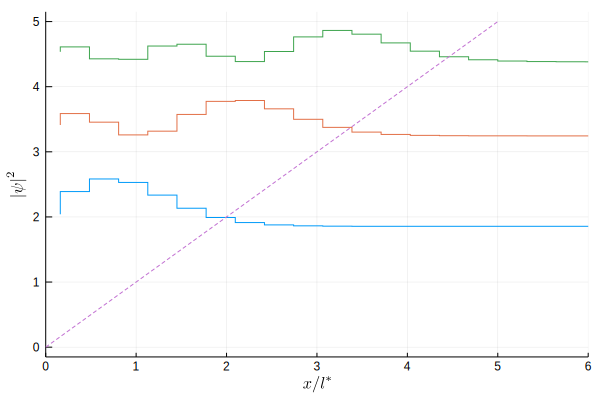

In [14]:
Δ, xs = make_grid(30, 10)
es, evs = r.λ, r.X
plot(xs .- 0.5*Δ, [abs2.(evs[:, i]) ./ Δ .+ real(es[i]) for i in 1:3], line=:steppre, label="")
plot!(identity, 0:5, line=:dash, label="")
xlims!(0,6)
plot!(xlabel="\$ x/l^* \$")
plot!(ylabel="\$ \\left| \\psi \\right|^2 \$")

The probability densities are offset from zero by their energies, so you can see the well-known quantum effect of the particle tunneling outside of the potential well (the gravitational potential is depicted by the dashed line).

I purposefully got rid of the default linear interpolation and kept the wave function constant within the interval $\Delta$ around each grid point to demonstrate how bad the real-space resolution is. The obvious solution is to simply increase $n_{max}$, but keep in mind that the number of matrix elements scales as $n_{max}^2$, so even doubling the number would go from 900 to 3600 elements. By standards of computational algebra, those are still tiny numbers but the quadratic scaling will hurt eventually. Fortunately, we have another option: As long as the Hilbert sub-space is large enough to represent the state with good enough fidelity (which it supposedly does, judging by the eigenvalues) we can change into the momentum basis and use the fact the the functions $\phi_n(x)$ are continuous and defined in the whole range $0 < x < l$. Currently, our states are vectors with components in the position basis $\vec{\psi} = \psi_j$, but we can use the representation transform operator to get the components in momentum basis $\psi_n = \sum _{j = 1} ^{n_{max}} X_{n j} \psi_j$. The wave function will then be reconstructed as a sum over the momentum basis functions:

$$ \psi(x) = \sum_{n = 1} ^{n_{max}} \psi_n \phi_n(x) = \sum_{n = 1} ^{n_{max}} \sum _{j = 1} ^{n_{max}} \phi_n(x) X_{n j} \psi_j,$$

like this:

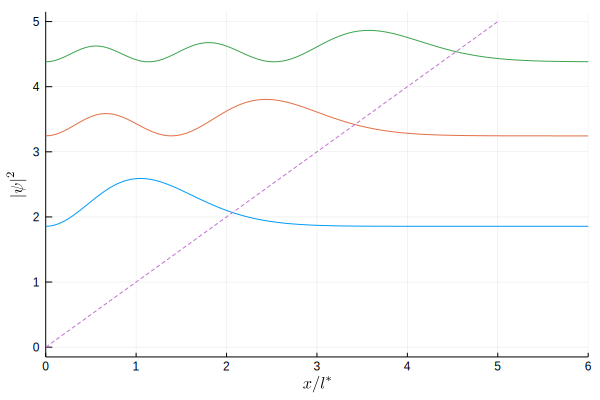

In [15]:
ψ(x, i) = [ϕ(x, n, 10) for n in 1:30]' * (Rpr(30) * evs[:, i])

plot([x -> abs2.(ψ(x, i)) + real(es[i]) for i in 1:3], 0:0.05:10, label="")
plot!(identity, 0:5, line=:dash, label="")
xlims!(0,6)
plot!(xlabel="\$ x/l^* \$")
plot!(ylabel="\$ \\left| \\psi \\right|^2 \$")

This makes the plot much more pleasing to the eye and better shows the probability leaking outside of the classically allowed region. It also makes it much easier to recognize the the the wave functions really are the Airy functions.

### Move it!

To spice things up a little bit, let's do some dynamics. In the previous part of this series, I went into the ins and outs of solving the time-dependent Schrödinger equation. In the final example, we coded a solver for the differential equation that gave us an approximate numerical solution because there was no way to solve it analytically and, in principle, we could do the same thing here. There is, however, a different way this time - remember, that you can get a simple expression for the time evolution operator if the Hamiltonian commutes with itself at different times, which allows me to write the time-dependent solution straight away:

$$ \left| \psi(t) \right> = e^{-\frac{i}{\hbar}\int _{t_0} ^{t} d\tau \hat{H}(\tau)} \left| \psi(t_0) \right> = e^{-\frac{i (t - t_0)}{\hbar}\hat{H}} \left| \psi(t_0) \right> ,$$

where the last part uses the fact that our Hamiltonian doesn't depend on time at all. The good news is that getting a solution is as easy as taking some initial state vector and act on it with the exponential of the Hamiltonian multiplied by some scalar. The bad news is that matrix exponentials are difficult to do numerically as can be seen even from the [Wikipedia article](https://en.wikipedia.org/wiki/Matrix_exponential). The obvious choice is do some form of series expansion, which is the go-to method for people doing analytical work. Many popular pieces of scientific computing software (like [Octave](https://octave.org/doc/interpreter/Functions-of-a-Matrix.html) or SciPy if Wikipedia is to be believed) use the [Padé approximant](https://en.wikipedia.org/wiki/Padé_approximant) but that's not good for large matrices because you have to invert a large matrix (of the same size as the exponentiated one) at a certain step of the calculation. A much better way is to use the fact that the exponential of a diagonal matrix is the same as a matrix with exponentials of the diagonal elements - to exponentiate a diagonal matrix you just apply the exponential element-wise. Of course, this saves you time only if you can diagonalize the matrix efficiently, but that's not an issue for us because our operator matrices are diagonal by construction...in their respective basis. The only thing that stands between us and a simple solution is the addition of two operators in the Hamiltonian which are not diagonal at the same time (doesn't mean that there is no basis in which they can be simultaneously diagonalized, we just don't have it). Fortunately, there is something called the [Baker-Campbell-Hausdorff formula](https://en.wikipedia.org/wiki/Baker–Campbell–Hausdorff_formula) (related to the [Lie-Trotter product](https://en.wikipedia.org/wiki/Lie_product_formula)) that leads to a formula that's very reminiscent of [Verlet (or second order sympletic)](https://en.wikipedia.org/wiki/Symplectic_integrator#A_second-order_example) splitting method:

$$\left| \psi(t) \right> = e^{-\frac{i (t - t_0)}{\hbar} \left( \hat{T} + \hat{V} \right)} \left| \psi(t_0) \right> \approx \left[ e^{-\frac{i(t-t_0)}{2 N \hbar}\hat{V}} \cdot e^{-\frac{i(t-t_0)}{N \hbar}\hat{T}} \cdot e^{-\frac{i(t-t_0)}{2 N \hbar}\hat{V}} \right]^N \left| \psi(t_0) \right> ,$$

which holds for large $N$. Here, it's important that the exponential of sum of operators changed into a product of operator exponentials, which allows you to represent each of the exponentials in the basis where the operator is diagonal and do the representation transform after, i.e. calculate the $\hat{T}_e = e^{-\frac{i(t-t_0)}{N \hbar}\hat{T}}$ in the momentum basis and then use $\hat{X} \cdot \hat{T}_e \cdot \hat{X}$ to bring it to position basis (assuming that the potential operator and the state are in position representation). The price you pay here is that you have to split the time interval $\delta t = (t-t_0)$ into $N$ small steps, so you'll be doing a lot of operator applications.

In [16]:
function eV(n_max, N, δt, Wg)
    α = -1im * (δt / N)
    f(v) = v .* exp.(α .* Wg ./ 2)
    LinearMap{ComplexF64}(f, n_max; issymmetric=true)
end

function eT(n_max, N, δt, mass, l)
    α = -1im * (δt / N)
    f(v) = map(enumerate(v)) do (n, el)
        exp(α * n^2 * π^2 / (2 * mass * l^2)) * el
    end
    LinearMap{ComplexF64}(f, n_max; issymmetric=true)
end

function U_split(n_max, N, δt, W, mass, l)
    Δ, xs = make_grid(n_max, l)
    VP = eV(n_max, N, δt, W.(xs))
    TP = Rpr(n_max) * eT(n_max, N, δt, mass, l) * Rpr(n_max)
    VP * TP * VP
end

function split_evolve(n_max, W, δt, N, ψ0, mass, l)
    t = 0.0
    t_out = [t]
    ψ_out = hcat(ψ0)
    UP = U_split(n_max, N, δt, W, mass, l)
    for n in 1:N
        t += δt/N
        append!(t_out, t)
        ψ_out = hcat(ψ_out, UP * ψ_out[:, end])
    end
    (t_out, ψ_out)
end;

Functions `eV` and `eT` are the operator exponentials in their preferred basis and the function `U_split` returns the time propagator in position representation. `split_evolve` handles the repeated applications of the approximate time evolution operator to do time propagation.

Another option is to use Krylov subspace of the matrix to find an optimal polynomial approximation to the exponential. The idea is that the exponential is dominated by only a small part of the full [spectrum](https://en.wikipedia.org/wiki/Spectrum_of_a_matrix), so one can calculate the approximate action of exponentiated operator using a much smaller projection onto the appropriate subspace:

$$e^{tH_N} \cdot \vec{v} \approx \left| \left| \vec{v} \right| \right|_2 V_M \cdot e^{tH_M} \cdot \vec{e}_1 ,$$

where $V_M = [\vec{v}_1, \ldots, \vec{v}_M]$ are the basis vectors $\{\vec{v}_i\}$ of an order-M Krylov subspace stacked into a matrix and $H_M = V_M ^T \cdot H \cdot V_M$ is the image of the original matrix in the subspace ($\vec{e}_i$ is just a unit vector in the basis). The important thing is, that the Krylov subspace can be small (even for matrices with sizes of more than 1000x1000, it might still be sufficient to have $M < 50$) which makes it possible to calculate the exponential by the usual means. For those who are interested in implementing it, [Expokit](https://www.maths.uq.edu.au/expokit/guide.html) has the algorithm documented in full detail. We don't need to do that, as the `KrylovKit` package already comes with this algorithm (the `exponentiate` function) which makes the functions much easier to write and allows us to propagate the state with arbitrary time-steps (and it uses the already defined Hamiltonian operator generated by the function `H`). The trade-off is that it is much slower when you want to do a fine-grained time trace, as each propagation takes a considerable amount of computation time because of the iteration needed to construct the Krylov subspace.

In [17]:
function U_krylov(H, δt, ψ0)
    dt = -δt * 1im
    exponentiate(v -> H * v, dt, ψ0)
end

function krylov_evolve(H, δt, nsteps, ψ0)
    t = 0.0
    t_out = [t]
    ψ_out = hcat(ψ0)
    for n in 1:nsteps
        t += δt
        new, info = U_krylov(H, δt, ψ_out[:, end])
        ψ_out = hcat(ψ_out, new)
        append!(t_out, t)
    end
    (t_out, ψ_out)
end;

The `U_krylov` function handles propagation from state `ψ0` by a time-step `δt` under action of Hamiltonian `H` and the function `krylov_evolve` does `nsteps` of such evolutions.

As with every solution to an equation of motion, we have to supply some initial condition, which will be a Gaussian packet (a wave packet with minimum uncertainty in position and momentum allowed):

In [18]:
function gaussian(x, μ, σ)
    exp(-((x - μ) / (2 * σ))^2)
end

function krylov_particleInWell(n_max, tmax, tsteps, x0, m, l)
    Δ, xs = make_grid(n_max, l)
    δt = tmax / tsteps
    
    ψ0 = [gaussian(x, x0, 1) for x in xs]
    ψ0 = ψ0 ./ norm(ψ0) # wave function should be properly normalized

    H = HP(n_max, identity, m, l)
    
    krylov_evolve(H, δt, tsteps, ψ0)
end

function split_particleInWell(n_max, tmax, tsteps, x0, mass, l)
    Δ, xs = make_grid(n_max, l)
    
    ψ0 = [gaussian(x, x0, 1) for x in xs]
    ψ0 = ψ0 ./ norm(ψ0) # wave function should be properly normalized
    
    split_evolve(n_max, identity, tmax, tsteps, ψ0, mass, l)
end;

We'll put the particle to $x_0 = 15 \, l^*$ to do it's thing for $10\sqrt{2x_0}$ time units (remember, time is in units of $t^*$) split into 400 steps in the same gravitational well as in the static example. We'll need better resolution in this example, so I increased $n_{max}$ to 1000 (this corresponds to 1 million matrix elements).

In [19]:
x0 = 15
τ = √(2*x0)

# Try both algorithms and play with the values, to get a feeling for their situational use
# ts, ψs = krylov_particleInWell(1000, 10*τ, 400, x0, 1, 30);

ts, ψs = split_particleInWell(1000, 10*τ, 400, x0, 1, 30);

In [20]:
Htest = HP(1000, identity, 1.0, 30);

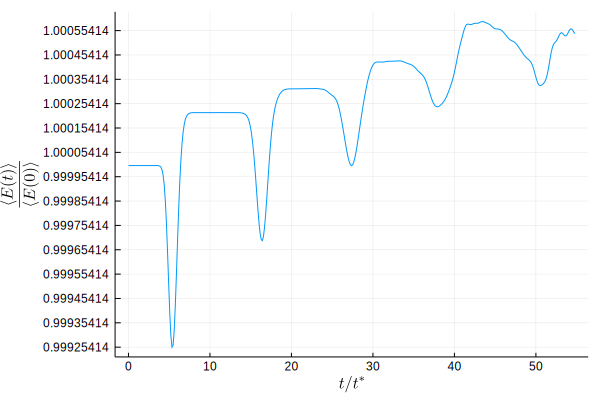

In [39]:
ave = real(diag(Matrix(ψs' * Htest' * ψs)))
ma = findmax(ave ./ ave[1])[1]
mi = findmin(ave ./ ave[1])[1]
plot(ts, ave ./ ave[1], label = "")
yticks!(mi:0.0001:ma)
ylabel!("\$ \\frac{\\left< E(t) \\right>}{\\left< E(0) \\right>} \$")
xlabel!("\$ t/t^* \$")

After the computation finishes (which should be quick if you're using the Verlet solver), we can make a nice animation of the particle moving around in the potential well. For comparison, I also added a classical point mass so you can see the correspondence between the quantum and classical mechanics.

In [ ]:
Δ, xs = make_grid(1000, 30)

function x_classical(t, x0, g)
    t1 = sqrt(2*x0 / g)
    r = (-t1):(-t1 + 2t1)
    n = length(r)
    x0 - 0.5*(mod(t - first(r), n) + first(r))^2
end

bouncing = @animate for (ψ, t) in zip(eachcol(ψs), ts)
    plot(xs, abs2.(ψ) ./ Δ, fill = 0, label="\$ \\left| \\Psi \\right| ^2\$", color=:darkred)
    scatter!([x_classical(t, 15, 1)], [0.65], markersize=10, label="Classical", color=:grey)
    yticks!(:none)
    xlims!(0,20)
    ylims!(0, 0.7)
    xgrid!(:off)
    xlabel!("\$ x/l^* \$")
end

gif(bouncing, "img/bouncing.gif", fps=30)

What you see might be surprising to some, and yet so boringly ordinary. The particle starts falling towards the ground (gravity points to the left in this situation), "reaches" it the classical time $\tau = \sqrt{\frac{2x_0}{g}}$, self-interferes and reflects and starts flying up until it reaches it's maximum height at a time that coincides with the classical points mass.

One thing you won't see in classical mechanics, is that the shape of the wave packet gets somewhat wonky as time passes. This is because the solutions to Schrödinger's equation are [dispersive](https://en.wikipedia.org/wiki/Wave_packet#Dispersive), physical and formal implications of which you can read about in plenty of places on the web (e.g. a discussion [here](https://physics.stackexchange.com/questions/73784/dispersion-of-probability-wave-packets)). To better see this effect, we can plot the mean expectation value of the position $ \left< \hat{x} \right> = \left< \psi \right| \hat{x} \left| \psi \right> = \sum _{j = 1} ^{n_{max}} x_j \left| \psi_j \right| ^2$ with the standard deviation $\sigma _x = \left< x^2 \right> - \left< x \right> ^2$:

In [ ]:
x_mean = [abs2.(ψ)' * xs for ψ in eachcol(ψs)]
x2_mean = [abs2.(ψ)' * xs.^2 for ψ in eachcol(ψs)]
σx = x2_mean .- (x_mean .* x_mean)

plot(leg=:topleft)
plot!(ts, x_mean .+ 0.5 .* σx, fill = x_mean .- 0.5 .* σx,
    alpha=0.2,
    label="",
    color = :darkred,
    width=0)
plot!(t -> x_classical(t, 15, 1), ts,
    label="\$ x_{classical} \$",
    color = :grey,
    width = 2)
plot!(ts, x_mean,
    label="\$ \\left< \\hat{x} \\right> \$",
    color = :darkred,
    width = 2)
ylims!(0, 22)

You can see that the mean position slowly drifts away from the classical trajectory and the uncertainty in position keeps increasing (as an exercise for you, dear reader, think of a hand-wavy reason for why does the uncertainty change so much specifically around the turning points of each bounce).

The nice thing about this problem is that the only free parameters are mass and potential. You can, for example, calculate the mean expectation value of position in the ground state $\left< x \right> = \left< \psi_1 \right| \hat{x} \left| \psi_1 \right>$ and multiply that number by $l^*$ with $m = 1.674 \cdot 10^{-27}$ kg, which is the mass of the neutron, and compare that to the [experimental results](http://www.users.csbsju.edu/~frioux/neutron/neutron.htm) (paywalled paper [here](https://www.nature.com/articles/415297a)). Alternatively, you can try to calculate energies of the confined state in [2D electron gases](https://en.wikipedia.org/wiki/Two-dimensional_electron_gas), where you have have a potential $W(x) = eFx$ with $e$ the charge of an electron and $F$ a constant that approximates the slope of the band edge at the interface (for a realistic values you can use those for GaAs, where $F \approx 5$ MV/m and $m = 0.067 m_e$ with $m_e$ being the mass of a free electron). The energy difference between the ground and first excited state should give you a rough idea of the temperature $T = \frac{E_2 - E_1}{k_B}$ needed for the electrons behave like a 2D system ($k_B$ is the Boltzmann constant).

*This is also a good halfway point in today's topic, so if you want to take a breather, now is the time. If you still haven't had enough, let's move on to something that's tangibly more quantum...*

### It takes two to tango

Physics would be rather boring without interactions. Especially in quantum mechanics, where most of non-interacting problems have been solved. Fortunately, me and others have some job security (haha...) because almost every particle out there has a tendency to interact with others. The interactions can get really complicated, but today we'll focus on pair interactions between two particles and use the formalism we learned previously. Let the two-particle Hamiltonian be

$$ \hat{H} = \hat{H}_1 + \hat{H}_2 + \hat{H}_{int} ,$$

where $\hat{H}_{1,2} = \hat{T}_{1,2} + \hat{V}_{1,2}$ are sub-Hamiltonians acting only on the single-particle sub-spaces (their kinetic energies and single-particle potentials) and $\hat{H}_{int}$ is the Hamiltonian that governs the two-particle interactions and acts on the whole Hilbert space of our system. The basis we'll use for this Hamiltonian will be a two-particle position basis $\left| \vartheta_{j_1}, \vartheta_{j_2} \right> = \left| \vartheta_{j_1} \right> \otimes \left| \vartheta_{j_2} \right> $, which leads to single-particle Hamiltonians with the form $\hat{H}_1 = \hat{H}_1 \otimes \hat{1}_2$ and $\hat{H}_2 = \hat{1}_1 \otimes \hat{H}_2$ (if you don't understand what you're reading, you should read the [second half](comp-phys-mass-1.html#What's-a-$\otimes$?) of the first part of the series). The interaction Hamiltonian will be represented by a potential that depends on the individual particle coordinates $V_{int}(x_1, x_2)$:

$$ \hat{H}_{int} = \int _0 ^l dx_1 dx_2 \left| x_1 \right> \otimes \left| x_2 \right> \hat{V}_{int} \left< x_1 \right| \otimes \left< x_2 \right| .$$

In our basis, this leads to the form:

$$
\begin{split}
\left< \vartheta_{j_1}, \vartheta_{j_2} \right| \hat{H}_{int} \left| \vartheta_{j_1 \prime}, \vartheta_{j_2 \prime} \right> &= \int_0 ^l dx_1 dx_2 \vartheta_{j_1}(x_1) \vartheta_{j_2}(x_2) \, V_{int}(x_1,x_2) \, \vartheta_{j_1 \prime} (x_1) \vartheta_{j_2 \prime} (x_2) \\ 
&\approx V_{int}(x_{j_1}, x_{j_2}) \int_0 ^l dx_1 dx_2 \vartheta_{j_1}(x_1) \vartheta_{j_2}(x_2)\vartheta_{j_1 \prime}(x_1) \vartheta_{j_2 \prime}(x_2) \\
&= V_{int}(x_{j_1}, x_{j_2})\delta_{j_1 j_1 \prime} \delta_{j_2 \prime j_2 \prime},
\end{split} $$

where we assume that the interaction potential is constant around each grid point and that the basis functions $\vartheta(x)$ are reasonably local and orthogonal - the same assumptions and arguments like in the single-particle case.

I know from experience that the indexing can get confusing for first-timers (just you wait until we get to many-particle systems in the future), so I'll elaborate on this a bit more: Because the potential $V_{int}$ depends on two coordinates, one might trick themselves into visualizing the Hilbert space as a plane and quickly lose intuition when doing the inner product $\left< \vartheta_{j_1}, \vartheta_{j_2} \right| \hat{H}_{int} \left| \vartheta_{j_1 \prime}, \vartheta_{j_2 \prime} \right>$ or if the system has more than three particles (if you think you can visualize higher than 3-dimensional space, you're wrong). A better way of thinking about this is by considering that you can flatten the "array" of the two-particle coordinates $(x_{j_1}, x_{j_2})$ into a one-dimensional vector, for example like this:

$$
\begin{bmatrix}
  (x_{1}, x_{1}) & (x_{1}, x_{2}) & \dots & (x_{1}, x_{n_{max}}) \\
  (x_{2}, x_{1}) & (x_{2}, x_{2}) & \dots & (x_{2}, x_{n_{max}}) \\
  \vdots & \vdots & \ddots & \vdots \\
  (x_{n_{max}}, x_{1}) & (x_{n_{max}}, x_{2}) & \dots & (x_{n_{max}}, x_{n_{max}}) \\
\end{bmatrix}
\mapsto
\begin{bmatrix}
  (x_{1}, x_{1}) \\
  (x_{2}, x_{1}) \\
  \vdots \\
  (x_{n_{max}}, x_{1}) \\
  (x_{1}, x_{2}) \\
  (x_{2}, x_{2}) \\
  \vdots \\
  (x_{n_{max}}, x_{2}) \\
  (x_{1}, x_{3}) \\
  (x_{2}, x_{3}) \\
  \vdots \\
  (x_{n_{max}}, x_{n_{max}})\\
\end{bmatrix}
=
\begin{bmatrix}
\xi_1 \\
\xi_2 \\
\vdots \\
\xi_{n_{max}^2} \\
\end{bmatrix}.
$$

Mapping like this is compatible with the [column-major ordering](https://en.wikipedia.org/wiki/Row-_and_column-major_order) of arrays in Julia and with the definition of Kronecker product that we use. In principle, any [bijection](https://en.wikipedia.org/wiki/Bijection) $(x_{j_1}, x_{j_2}) \mapsto \xi_m$ works, but it's best to use something that follows the computer memory layout to get the best efficiency and to minimize headaches when writing the code (array flattening, reshaping and tensor products usually follow the array ordering too). Many of you probably already encountered this in textbooks or papers, where people say something like "$\left| \xi_m \right>$ where $m$ indexes over all spatial and spin degrees of freedom..." and implicitly assume some "flattening" like the above - it's much easier to write $\left< \xi _m \right| \hat{H} \left| \xi _{m\prime} \right>$ than $\left< x_{j_1}, y_{k_1}, z_{l_1}, \sigma_{s_1}, x_{j_2}, y_{k_2}, z_{l_2}, \sigma_{s_2} \right| \hat{H} \left| x_{j_1\prime}, y_{k_1\prime}, z_{l_1\prime}, \sigma_{s_1\prime}, x_{j_2\prime}, y_{k_2\prime}, z_{l_2\prime}, \sigma_{s_2\prime} \right>$, especially if you don't plan to do numerical solutions.

Writing the Hamiltonian is easy. The single-particle parts are the same as before, we only need the new interaction potential, which acts on the flattened state vector:

In [ ]:
function Vint(n_max, W, l)
    Δ, xs = make_grid(n_max, l)
    inds = CartesianIndices((n_max, n_max))
    f(v) = map(zip(v, inds)) do (el, ij)
        (i, j) = Tuple(ij)
        el * W(xs[i], xs[j])
    end
    LinearMap(f, n_max^2; issymmetric=true)
end

function twoParticleH(n_max, β, α, W, Wint, l)
    id = LinearMap(identity, n_max; issymmetric=true)
    m = 1
    Δ, xs = make_grid(n_max, l)
    
    # Single-particle kinetic energy
    TP1p = Rpr(n_max) * T(n_max, m, l) * Rpr(n_max)
    TP = kron(TP1p, id) + kron(id, TP1p)
    
    # Single-particle potential
    V1p = V(n_max, W.(xs))
    VP = kron(V1p, id) + kron(id, V1p)
    
    # Two-particle potential
    VPint = Vint(n_max, Wint, l)
    
    TP + α * VP + β * VPint
end;

I used `CartesianIndices` to create an iterator over the two single-particle indices $(j_1, j_2)$ and multiply the wave function component $\psi_{j_1, j_2}$ the same way as you do in the single-particle case. If you're using a different language to program along and don't have a function to calculate the index for you, you need to just invert the [offset calculation](https://en.wikipedia.org/wiki/Row-_and_column-major_order#Address_calculation_in_general), e.g. `i = l / n_max` and `j = l % n_max` for zero-indexed, row-major arrays. The full Hamiltonian `twoParticleH` extends the single-particle parts using a kronecker product with the identity operator (another nice things about `LinearOperator`s is that you can use the `kron` function as if they were just matrices) and adds all of them together. I also added parameters `α` and `β` to tune the strength of the single-particle and interaction potentials.

With that, we just need to do the eigendecomposition of the Hamiltonian, which is in this case done by `solveTwoParticle` function:

In [ ]:
function solveTwoParticle(n_max, n,  β, α, W, Wint, l)
    HP2 = twoParticleH(n_max, β, α, W, Wint, l)
    lobpcg(HP2, false, n)
end;

We need to decide on what the interaction of the particles will be. Probably the first thing that comes to everyones mind is $V(x_1, x_2) \propto \frac{1}{\left| x_1 - x_2 \right|}$ potential such as gravitational or electrostatic interaction, but that's too long-range to nicely demonstrate what I want to show. I want some form of more localized interaction. The most localized would be contact interaction $V(x_1, x_2) = \delta(x_1 - x_2)$, but that's numerically inconvenient (we operate on a grid which causes too many singularities). A good middle ground is the potential

$$ V(r) = \frac{e^{-r}}{r} ,$$

which many of you might have already encountered. Plasma physicists know it as the [Debye](https://en.wikipedia.org/wiki/Debye_length) screening potential, solid state and condensed matter people use the name [Thomas-Fermi](https://en.wikipedia.org/wiki/Thomas–Fermi_screening) potential and particle physicists prefer to call it [Yukawa](https://en.wikipedia.org/wiki/Yukawa_potential) potential. As you would guess by the fact that there exist three different fields that give it a unique name, this potential pops up quite frequently everywhere, which makes it a good example. The most tangible physical motivation for it is from the plasma case, where the charged particles of a plasma try to move around such that electrostatic fields are minimized. This means, that if we put a test charge into the plasma, the plasma reacts and tries to "hide" the electric potential, which is called [screening](https://en.wikipedia.org/wiki/Electric-field_screening). The Thomas-Fermi case is the same, but you substitute the plasma with the sea of free electrons and the lattice of the material, which might or might not be of quantum nature. In particle physics, the exponential decay is related to the mass of the interaction mediators (this is why the weak nuclear force is short ranged - the W and Z bosons have non-zero mass).

In [ ]:
pair(x, y) = ifelse(abs(x - y) > 0.09, exp(-abs(x - y)) / abs(x - y), exp(-0.09)/0.09);

You'll notice that I had to introduce a cutoff length (which I set to $\Delta = 0.09$), to avoid division by zero (the `ifelse` function is similar to a `if` statement but evaluates both arguments and the return type is known at compile-time, which prevents  some type instability and branch mispredictions). As long as the energies of the particles are smaller than the potential at the cutoff value, this truncated potential is the same as the analytical form.

With that, you can take the same system as before: throw two particles into the triangular well, have them interact by the screened interaction, twist it, bop it, solve it...

In [ ]:
r = solveTwoParticle(100, 8, 1.0, 1.0, identity, pair, 10);

And plot it:

In [ ]:
function plot_wf(evs, n, n_max, l)
    Δ, xs = make_grid(n_max, l)
    ma = findmax(real.(evs[:, n]))[1] / sqrt(Δ)
    mi = -findmin(real.(evs[:, n]))[1] / sqrt(Δ)
    ml = max(ma, mi)
    heatmap(xs, xs,
        real.(reshape(evs[:, n] ./ sqrt(Δ), (n_max, n_max))),
        aspect_ratio=:equal,
        color=:RdGy,
        leg=:none,
        clim=(-ml, ml),
        xlims=(0,8),
        ylims=(0,8),
        title="n = $n",
        xlabel="\$ x_1 / l^* \$",
        ylabel="\$ x_2 / l^* \$")
end

evs = r.X

l = @layout grid(4,2)
ps = []
for n in 1:8
    ps = push!(ps, plot_wf(evs, n, 100, 10.0))
end

plot(ps..., layout=l, size=(500, 1000))

And we can do the same with an attractive interaction between the particles (`β` = -1):

In [ ]:
r = solveTwoParticle(100, 8, -1.0, 1.0, identity, pair, 10)

evs = r.X

l = @layout grid(4,2)
ps = []
for n in 1:8
    ps = push!(ps, plot_wf(evs, n, 100, 10.0))
end

plot(ps..., layout=l, size=(500, 1000))

So cool.

OK, there are few things worth mentioning. First, yes, the calculation takes considerably more time than just the single-particle case. This is for the reasons I already explained [previously](comp-phys-mass-1.html#Search-for-more-space%28s%29-or:-How-many-bits-does-it-take-to-store-the-concept-of-multiple-sine-functions?): The total number of basis elements in a product space is $n = \prod _{k=1} ^{n_{max}} n_k = n_{max}^2$ and our two-particle Hamiltonian matrix has $n_{max}^4$ elements. Adding even one more particle would increase the number of operations by a factor of 100 (if we keep $n_{max}$ the same), making it too computationally expensive to be worth it.

The second thing is that you need to read the plots correctly. This is not a 2D system - the particles live in a one-dimensional world exactly the same as the cases we calculated beforehand. The plot has two axes, because it has two degrees of freedom: coordinates of each particle. The way to read those plots is that the value of $\left| \psi (x_1, x_2) \right| ^2$ is the probability of the particle 1 being at $x_1$ and particle 2 at $x_2$, with $x_1$ and $x_2$ lying on the same line.

Third thing is obvious, but I will still mention it: You see that with repulsive interaction, the particles prefer to be far away from each other (the probability is low close to the "diagonal" $x_1 = x_2$ of the plot). With attractive interaction, the particles, unsurprisingly, attract and stick together (unless they don't, more on that in a second).

There's one last thing that sticks out, and it's also the most important because it's something that cannot be seen in the classical world: You see the two different colors? I removed the colorbar, so it might be hard to tell, but red and black have opposite signs, a fact which probably deserves it's own small section:

### Indistinct and exchangeable

In most of our daily experience, you can clearly distinguish objects. That car is *that* car because it's there and a goes in a certain direction. You can always tell two classical cows (spherical or not) apart: Daisy is grazing there on the hill and Shelly is at the patch of grass by the barn.

You cannot do that in quantum world. Imagine a situation where you have two electrons and at first you measure their positions $x_1$ and $x_2$. After some time (long enough so that you don't measure the still collapsed eigenstate from the first measurement) you measure them again and get $x_1^{\prime}$ and $x_2^{\prime}$. Because you measured positions, you collapsed the state into a position eigenstate and have no idea about the possible trajectories of the particles, so there's no way of knowing if the electron that was originally at $x_1$ went to position $x_1^{\prime}$ or $x_2^{\prime}$ - the identity of the electrons between the measurements got erased. This is a general concept that applies not only to electrons and not only to measurements of positions: All quantum objects of the same type (as defined by their properties like charge, mass, etc.) are fundamentally [indistinguishable](https://en.wikipedia.org/wiki/Identical_particles), where the only identifiable thing is the *state* a particle can be in, not the particle itself. As we'll see in this section and many times in the future, this phenomenon has broad impact on basically all of quantum mechanics, but is not found anywhere in classical physics, possibly with the exception of entropy of classical gases, where it is known as the [Gibbs paradox](https://en.wikipedia.org/wiki/Identical_particles).

Now, let's take a wave function of two identical particles in position representation $\psi(x_1,x_2)$, similar to the plots above. Because the particles are identical, switching their places cannot have an impact on the observables, i.e. $\left| \psi(x_1, x_2) \right|^2 = \left| \psi(x_2, x_1) \right|^2$. This means that the two wave functions are the same, up to a global phase rotation:

$$ \psi(x_1, x_2) = e^{i \alpha} \psi(x_2, x_1) .$$

We can now use the argument twice to get the equation

$$ \psi(x_1, x_2) = e^{i \alpha} \psi(x_2, x_1) = e^{2i \alpha} \psi(x_1, x_2) ,$$

and that can only hold true if $e^{2i \alpha} = 1$, which has two solutions: $e^{i \alpha} = 1$ and $e^{i \alpha} = -1$. This means that there exist two kinds particles, distinguished by what their wave function does if you exchange them:

$$ 
\begin{split}
\psi(x_1, x_2) &= \psi(x_2, x_1) \\
\psi(x_1, x_2) &= -\psi(x_2, x_1).
\end{split}
$$

The first type of particles are what we call bosons, which have integer spin and the second fermions, particles with half-integer spin. The [Pauli exclusion principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle) can be easily gleaned from the above equations, because the only solution to two identical fermions at the same place $\psi(x, x) = -\psi(x, x)$ is $\psi = 0$. If you don't see why the two above equations should say anything about spin, don't worry, it's not obvious. That part is handled by something known as the [spin-statistics theorem](https://en.wikipedia.org/wiki/Spin–statistics_theorem), which I won't explain more because it's not important right now and the the Wikipedia article does that more than adequately.

If we can write down a particle switching operator $\hat{P}$, such that $\psi(x_1, x_2) = \left< x_2, x_1 | \psi \right> = \left< x_1, x_2 \right| \hat{P} \left| \psi \right>$, we can determine the symmetry of any our two-particle states by calculating the expectation value $\left< \psi \right| \hat{P} \left| \psi \right>$. That part is easy:

In [ ]:
function P(n_max)
    f(v) = reshape(v, (n_max, n_max)) |> m -> permutedims(m, (2,1)) |> m -> reshape(m, (n_max^2,))
    LinearMap(f, n_max^2, issymmetric=true)
end;

We just take the flattened vector of position coefficients, reshape it back into the 2D array, transpose and flatten it back. With just two particles, each eigenstate of the Hamiltonian above has to be either symmetric or antisymmetric ($\hat{H}$ and $\hat{P}$ commute), as you cane easily convince yourself by meditating on it a little bit, or by directly calculating the expectation values like this:

In [ ]:
evs[:, 1]' * P(100) * evs[:, 1]

There is some floating arithmetic error, which makes the expectation values not exactly $\pm 1$, but the values are still easy to distinguish.

The trickier part comes when we decide to change the order of steps in our solution: What if we only want the (anti)symmetric states and don't care about the others? Because they are subspaces of the Hilbert space of our Hamiltonian, there should exist a projector that will carve out only the subspace we need. And it does, indeed, [exist](http://quantum.phys.cmu.edu/qm2/qmc161.pdf). The catch is, that this operator is composed of a weighted average of all members of the [symmetric permutation group](https://en.wikipedia.org/wiki/Symmetric_group) and that bad boy has $n_{max}!$ elements, which a bit too large of a number to work with:

In [ ]:
factorial(big(100))

*The function `big` turns the number into an arbitrarily large `BigInt`, because the result is too big to be represented using 64-bit integers.*

The situation looks dire, but not all hope is lost. A second way is to use the eigendecomposition of the operator $\hat{P}$. Turns out, that the transposed matrix of all (anti)symmetric eigenvectors will be the projector we're looking for. That, however, means forming a dense matrix from a large number of eigenvectors - $\frac{n_{max}(n_{max} - 1)}{2}$ of them for the antisymmetric case and $\frac{n_{max}(n_{max} + 1)}{2}$ if we're wanting to project on the symmetric subspace, so the no free lunch principle still applies (it made the lunch cheaper, though).

In [ ]:
function Πa(n_max)
    Pop = P(n_max)
    n = Int(n_max*(n_max - 1)/2)
    r = lobpcg(Pop, false, n)
    LinearMap(r.X')
end

function Πs(n_max)
    Pop = P(n_max)
    n = Int(n_max*(n_max + 1)/2)
    r = lobpcg(Pop, true, n)
    LinearMap(r.X')
end;

With these two operators the Hamiltonian of the (anti)symmetric subspace becomes $\hat{H}_{a,s} = \hat{\Pi}_{a,s} \cdot \hat{H} \cdot \hat{\Pi}^{\prime}_{a,s}$:

In [ ]:
function solveTwoParticle_s(n_max, n,  β, α, W, Wint, l, symmetry=1)
    Πop = if symmetry > 0 Πs(n_max) else Πa(n_max) end
    HP2 = twoParticleH(n_max, β, α, W, Wint, l)
    (lobpcg(Πop * HP2 * Πop', false, n), Πop)
end;

I have the function `solveTwoParticle_s` return the solution and the (anti)symetrizer `Πop`, which we need in order to return the solution back to the full Hilbert space to plot stuff. The eigenvalues of $\hat{P}$ are highly degenerate, so repeated calls to `Πs` or `Πa` need not return the same matrix (the eigenvectors are ordered by magnitude of eigenvalues) and trying to change back into the full basis with a different `Πop` will scramble the components of the state vector.

In [ ]:
r, Πop = solveTwoParticle_s(50, 8, -1.0, 1.0, identity, pair, 10.0, -1);

(I reduced $n_{max}$ to 50 so that I don't waste too much time on computation). We can now plot the solutions of the anti-symmetrized repelling Hamiltonian and see that they are, indeed, all fermionic states:

In [ ]:
evs = Matrix(Πop' * r.X)

l = @layout grid(4, 2)
ps = []
for n in 1:8
    ps = push!(ps, plot_wf(evs, n, 50, 10.0))
end

plot(ps..., layout=l, size=(500, 1000))

In the first line, I projected back into the full Hilbert space, so that I can easily plot th the wave functions using the machinery that we already have. The higher excited states are getting a bit too wide for the size of our potential well, so I wouldn't trust them being quantitatively correct, but all clearly demonstrate that the antisymmetrization works.

Before we conclude, there's one more thing to show. I said that the particle exchange symmetry of many-particle wave functions has huge impact on physics but I haven't demonstrated it in any way. There will be plenty of examples in the future, especially once we start dealing with solid state and condensed matter systems, but let's see if there's is something also in this two-particle well too.

The most obvious difference between the symmetric and anti-symmetric case is in the particle relative position. Just by looking at the density wave function plots, you can clearly see that the fermions refuse to exist at the same spot, so any property that depends on their overlap will be affected too. One of these is the total energy of the two-particle system which depends on the overlap through the pair potential. The "closer" they are to each other, the higher (or lower, depending on the sign) the interaction energy will be. To demonstrate that, let's see what the eigenenergies look like as function of the pair interaction strength $\beta$.

In [ ]:
function get_energy(n_max, n, β, W, Wint, l, symmetry=1)
    r = solveTwoParticle_s(n_max, n,  β, 1.0, W, Wint, l, symmetry)[1]
    r.λ
end;

I quickly cobbled together a function that returns only the energies and will map it onto a range of $\beta$s:

In [ ]:
pair2(x, y) = ifelse(abs(x - y) > 0.19, exp(-abs(x - y)) / abs(x - y), exp(-0.19)/0.19)

βs = -5:0.5:5
e_sym = [get_energy(50, 3, β, identity, pair2, 10.0, 1) for β in βs]'
e_asym = [get_energy(50, 3, β, identity, pair2, 10.0, -1) for β in βs]';

I also had to include a new pair interaction potential function, to accommodate for the coarser grid (the cutoff is hardcoded because I'm lazy). Let's plot the energies and see what we see:

In [ ]:
plot(βs, vcat(e_sym...), color=1, label=["Bosons" "" ""])
plot!(βs, vcat(e_asym...), color=2, label=["Fermions" "" ""])
xaxis!("\$ \\beta \$")
yaxis!("\$ E/ E^* \$")
plot!(leg=:bottomright)

For $\beta > 0$, things don't change much and there's little difference between bosons and fermions. That's because the pair interaction naturally forces the particles apart. On top of that, the exponential dependence of the pair potential introduces a cutoff, beyond which the two particles don't feel each other, so the situation looks almost like two solid marbles touching, with little dependence on the interaction strength.

The more interesting stuff happens in the attractive region ($\beta < 0$), where the pair interaction would want to pull the particles close to each other. Bosons have no problem doing this and they keep forming a "tighter bond", falling into a deeper potential well as the interaction gets stronger. The fermions, however, can get only so close to each other and, because the interaction is short ranged, their bonding energy (which depends on how close they are) changes slowly. If I made $\beta$ even more negative, the pair interaction would overwhelm the exchange interaction and the the energy dependence would become roughly linear too, but with a smaller slope, because the Pauli exclusion still holds.

This behavior will become important once we do Hartree-Fock and density functional theories, where the exchange-driven repulsion creates an [exchange-correlation hole](http://cmt.dur.ac.uk/sjc/thesis_ppr/node28.html) and its interplay with the electrostatic interaction will determine the final electron density in molecules and solids.

---

That's it. With what you learned in this and the previous part, you should be able to solve most the undergraduate quantum mechanics, up to non-relativistic model of the hydrogen atom and quantum harmonic oscillators and their dynamics. In the next part, I might return to this naive approach one last time and demonstrate coupling of spin/angular momentum and position degrees of freedom, but that's about as far as this framework allows us to go. From there, we will have to start introducing much more complicated methods and approximations, but we will be able to calculate properties of much more real, tangible objects than just toy models.